In [ ]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

**My own example 1**

In [ ]:
listado = ['True', False, 45, 6]
listado

['True', False, 45, 6]

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


**My own example 2**

In [ ]:
Third = listado[2]
two = listado[1]
print("two:", two)
print("Third:", Third)

two: False
Third: 45


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


**My own example 3**

In [ ]:
ultimo = listado[-1]
penultimo= listado[-2]
print(ultimo, penultimo)

6 45


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

**My own example 4**

In [ ]:
mini = listado[1:3]
mini

[False, 45]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

**My own example 5**

In [ ]:
tres = listado[:3]
tres

['True', False, 45]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

**My own example 6**

In [ ]:
ultimos = listado[3:]
ultimos

[6]

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

**My own example 7**

In [ ]:
listado = [46334643,'restsees','hrhrhttt','5ydrr',54,'6',True,'8']
listado[3:9:3]

['5ydrr', True]

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

**My own example 8**

In [ ]:
listado[::-1]

['8', True, '6', 54, '5ydrr', 'hrhrhttt', 'restsees', 46334643]

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


**My own example 9**

In [ ]:
listado = [77777777777,'jijijijijijaja','23','d']
print("antes", listado)
listado.append("e")
print("despues", listado)

antes [77777777777, 'jijijijijijaja', '23', 'd']
despues [77777777777, 'jijijijijijaja', '23', 'd', 'e']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

**My own example 10**

In [ ]:
listado = ['1','ffB','Cf','ffffd']
[h + 'AE' for h in listado]

['1AE', 'ffBAE', 'CfAE', 'ffffdAE']

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

**My own example 11**

In [ ]:
Marca = {"GG": "Gucci", "7up": "seven-up", "PR" : "Prada"}
Marca

{'GG': 'Gucci', '7up': 'seven-up', 'PR': 'Prada'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

**My own example 12**

In [ ]:
Marca["GG"] = "GoodGame"
Marca

{'GG': 'GoodGame', '7up': 'seven-up', 'PR': 'Prada'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

**My own example 13**

In [ ]:
del Marca["PR"]
Marca

{'GG': 'GoodGame', '7up': 'seven-up'}

In [ ]:
# No slicing.

philosophers['Bertrand':'Immanuel']

**My own example 14**

In [ ]:
Marca["7up":"GG"]

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

**My own example 15**

In [ ]:
x = [[13,14,15],
     [16,17,18],
     [16,17,18],
     [16,17,18]]

y = [[9,8,7,23,23],
     [10,11,12,23,23],]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 48 µs, sys: 0 ns, total: 48 µs
Wall time: 52.9 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 16**

In [ ]:
%%time
matmul(x, y)

CPU times: user 42 µs, sys: 1 µs, total: 43 µs
Wall time: 47.9 µs


[[257, 258, 259, 621, 621],
 [314, 315, 316, 759, 759],
 [314, 315, 316, 759, 759],
 [314, 315, 316, 759, 759]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.11327966427074465, 0.4307269679845356, 0.8993675720560358],
 [0.715333685492867, 0.1321880363702097, 0.6371525924552385]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 8.81 s, sys: 31.4 ms, total: 8.85 s
Wall time: 9.13 s


**My own example 17**

In [ ]:
%%time
RandM1 = random_matrix(400,100)
RandM2 = random_matrix(100,400)
f = matmul(RandM1, RandM2)

CPU times: user 3.35 s, sys: 13.3 ms, total: 3.36 s
Wall time: 3.36 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

**My own example 18**

In [ ]:
things = [float(i) for i in range(100,1000)]
Arrthings = np.array(things)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.9 ms, sys: 32 µs, total: 13 ms
Wall time: 14.6 ms


333328333350000.0

**My own example 19**

In [ ]:
%%time
python_dot_product(things, things)

CPU times: user 154 µs, sys: 0 ns, total: 154 µs
Wall time: 162 µs


332505150.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 199 µs, sys: 6 µs, total: 205 µs
Wall time: 247 µs


333328333350000.0

**My own example 20**

In [ ]:
%%time
fortran_dot_product(Arrthings, Arrthings)

CPU times: user 11 µs, sys: 1 µs, total: 12 µs
Wall time: 15.5 µs


332505150.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

**My own example 21**

In [ ]:
mul_elemwise([12,1,23], ["Hola", 33333, 214])

['HolaHolaHolaHolaHolaHolaHolaHolaHolaHolaHolaHola', 33333, 4922]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

**My own example 22**

In [ ]:
things = np.array([12,123,1234,4567,44444])
things

array([   12,   123,  1234,  4567, 44444])

In [ ]:
data + data

array([2, 4, 6, 8])

**My own example 23**

In [ ]:
things + things

array([   24,   246,  2468,  9134, 88888])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 524 µs, total: 524 µs
Wall time: 534 µs


333328333350000.0

**My own example 24**

In [ ]:
%%time
(things * things).sum()

CPU times: user 31 µs, sys: 1 µs, total: 32 µs
Wall time: 36.2 µs


1997664654

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.92 ms, sys: 30 µs, total: 1.95 ms
Wall time: 1.36 ms


333328333350000.0

**My own example 25**

In [ ]:
%%time
things.dot(things)

CPU times: user 21 µs, sys: 0 ns, total: 21 µs
Wall time: 25.7 µs


1997664654

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 222 µs, sys: 0 ns, total: 222 µs
Wall time: 247 µs


333328333350000.0

**My own example 26**

In [ ]:
%%time
fortran_dot_product(things, things)

CPU times: user 22 µs, sys: 1 µs, total: 23 µs
Wall time: 26.5 µs


1997664654.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

**My own example 27**

In [ ]:
things[1] = "Hola"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

**My own example 28**

In [ ]:
#things.append(7)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

**My own example 29**

In [ ]:
things2 = things.reshape(5,1)
things2

array([[   12],
       [  123],
       [ 1234],
       [ 4567],
       [44444]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


**My own example 30**

In [ ]:
Arr = np.array([9,8,7,6,5,4,3,2,1], dtype='int64').reshape(3, 3)
print("Array:\n", Arr, sep='')
print("===========")
print("DType:", Arr.dtype)
print("Shape:", Arr.shape)
print("Strides:", Arr.strides)
print("Data:", Arr.data.tobytes())

Array:
[[9 8 7]
 [6 5 4]
 [3 2 1]]
DType: int64
Shape: (3, 3)
Strides: (24, 8)
Data: b'\t\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

**My own example 31**

In [ ]:
things = np.arange(10*10).reshape(10,10)
things

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

**My own example 32**

In [ ]:
things * things

array([[   0,    1,    4,    9,   16,   25,   36,   49,   64,   81],
       [ 100,  121,  144,  169,  196,  225,  256,  289,  324,  361],
       [ 400,  441,  484,  529,  576,  625,  676,  729,  784,  841],
       [ 900,  961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521],
       [1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401],
       [2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481],
       [3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761],
       [4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241],
       [6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921],
       [8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

**My own example 33**

In [ ]:
np.sqrt(things)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
        2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739,
        3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894],
       [4.47213595, 4.58257569, 4.69041576, 4.79583152, 4.89897949,
        5.        , 5.09901951, 5.19615242, 5.29150262, 5.38516481],
       [5.47722558, 5.56776436, 5.65685425, 5.74456265, 5.83095189,
        5.91607978, 6.        , 6.08276253, 6.164414  , 6.244998  ],
       [6.32455532, 6.40312424, 6.4807407 , 6.55743852, 6.63324958,
        6.70820393, 6.78232998, 6.8556546 , 6.92820323, 7.        ],
       [7.07106781, 7.14142843, 7.21110255, 7.28010989, 7.34846923,
        7.41619849, 7.48331477, 7.54983444, 7.61577311, 7.68114575],
       [7.74596669, 7.81024968, 7.87400787, 7.93725393, 8.        ,
        8.06225775, 8.1240384 , 8.18535277, 8.24621125, 8.30662386],
       [8.36660027, 8.42614977, 8.4852813

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

**My own example 34**

In [ ]:
(things % 23) == 0

array([[ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

**My own example 35**

In [ ]:
((things % 3) == 1) | ((things % 12) == 0)

array([[ True,  True, False, False,  True, False, False,  True, False,
        False],
       [ True, False,  True,  True, False, False,  True, False, False,
         True],
       [False, False,  True, False,  True,  True, False, False,  True,
        False],
       [False,  True, False, False,  True, False,  True,  True, False,
        False],
       [ True, False, False,  True, False, False,  True, False,  True,
         True],
       [False, False,  True, False, False,  True, False, False,  True,
        False],
       [ True,  True, False, False,  True, False, False,  True, False,
        False],
       [ True, False,  True,  True, False, False,  True, False, False,
         True],
       [False, False,  True, False,  True,  True, False, False,  True,
        False],
       [False,  True, False, False,  True, False,  True,  True, False,
        False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

**My own example 36**

In [ ]:
things @ things.T

array([[  285,   735,  1185,  1635,  2085,  2535,  2985,  3435,  3885,
         4335],
       [  735,  2185,  3635,  5085,  6535,  7985,  9435, 10885, 12335,
        13785],
       [ 1185,  3635,  6085,  8535, 10985, 13435, 15885, 18335, 20785,
        23235],
       [ 1635,  5085,  8535, 11985, 15435, 18885, 22335, 25785, 29235,
        32685],
       [ 2085,  6535, 10985, 15435, 19885, 24335, 28785, 33235, 37685,
        42135],
       [ 2535,  7985, 13435, 18885, 24335, 29785, 35235, 40685, 46135,
        51585],
       [ 2985,  9435, 15885, 22335, 28785, 35235, 41685, 48135, 54585,
        61035],
       [ 3435, 10885, 18335, 25785, 33235, 40685, 48135, 55585, 63035,
        70485],
       [ 3885, 12335, 20785, 29235, 37685, 46135, 54585, 63035, 71485,
        79935],
       [ 4335, 13785, 23235, 32685, 42135, 51585, 61035, 70485, 79935,
        89385]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

**My own example 37**

In [ ]:
 cosenooo = np.cos(np.linspace(1, 3.14, 123))

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

**My own example 38**

In [ ]:
cosenooo[0]

0.5403023058681398

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

**My own example 39**

In [ ]:
cosenooo[:32]

array([0.54030231, 0.52545971, 0.51045545, 0.49529413, 0.47998042,
       0.46451903, 0.44891472, 0.43317228, 0.41729657, 0.40129246,
       0.38516489, 0.36891881, 0.35255922, 0.33609116, 0.31951968,
       0.3028499 , 0.28608694, 0.26923596, 0.25230213, 0.23529068,
       0.21820684, 0.20105586, 0.18384302, 0.16657361, 0.14925295,
       0.13188637, 0.11447922, 0.09703683, 0.0795646 , 0.06206788,
       0.04455207, 0.02702255])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

**My own example 40**

In [ ]:
cosenooo[59:]

array([-0.44763759, -0.46325333, -0.47872654, -0.49405246, -0.50922637,
       -0.5242436 , -0.53909953, -0.55378959, -0.56830926, -0.58265408,
       -0.59681963, -0.61080155, -0.62459553, -0.63819735, -0.6516028 ,
       -0.66480777, -0.6778082 , -0.69060007, -0.70317947, -0.71554251,
       -0.72768539, -0.73960438, -0.75129581, -0.76275609, -0.77398168,
       -0.78496913, -0.79571506, -0.80621617, -0.81646923, -0.82647108,
       -0.83621863, -0.84570891, -0.85493897, -0.86390599, -0.87260721,
       -0.88103994, -0.8892016 , -0.89708967, -0.90470172, -0.91203541,
       -0.9190885 , -0.9258588 , -0.93234423, -0.9385428 , -0.9444526 ,
       -0.95007181, -0.95539871, -0.96043165, -0.96516909, -0.96960957,
       -0.97375172, -0.97759426, -0.98113603, -0.98437592, -0.98731293,
       -0.98994617, -0.99227483, -0.99429819, -0.99601562, -0.9974266 ,
       -0.99853069, -0.99932756, -0.99981696, -0.99999873])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

**My own example 41**

In [ ]:
cosenooo[::42]

array([ 0.54030231, -0.16516468, -0.78496913])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


**My own example 42**

In [ ]:
print(cosenooo[cosenooo != 0.5])

[ 0.54030231  0.52545971  0.51045545  0.49529413  0.47998042  0.46451903
  0.44891472  0.43317228  0.41729657  0.40129246  0.38516489  0.36891881
  0.35255922  0.33609116  0.31951968  0.3028499   0.28608694  0.26923596
  0.25230213  0.23529068  0.21820684  0.20105586  0.18384302  0.16657361
  0.14925295  0.13188637  0.11447922  0.09703683  0.0795646   0.06206788
  0.04455207  0.02702255  0.00948471 -0.00805605 -0.02559432 -0.04312472
 -0.06064185 -0.07814033 -0.09561476 -0.11305977 -0.13047    -0.14784009
 -0.16516468 -0.18243846 -0.19965611 -0.21681233 -0.23390184 -0.25091938
 -0.26785972 -0.28471765 -0.30148797 -0.31816553 -0.3347452  -0.35122188
 -0.36759049 -0.38384601 -0.39998342 -0.41599777 -0.43188412 -0.44763759
 -0.46325333 -0.47872654 -0.49405246 -0.50922637 -0.5242436  -0.53909953
 -0.55378959 -0.56830926 -0.58265408 -0.59681963 -0.61080155 -0.62459553
 -0.63819735 -0.6516028  -0.66480777 -0.6778082  -0.69060007 -0.70317947
 -0.71554251 -0.72768539 -0.73960438 -0.75129581 -0

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

**My own example 43**

In [ ]:
cosenooo[[12,3,4]]

array([0.35255922, 0.49529413, 0.47998042])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

**My own example 44**

In [ ]:
unsort = np.array([4,5,8,5,6,2,4,4,75,5,5,5,566,7])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

**My own example 45**

In [ ]:
sort = np.argsort(unsort)
sort

array([ 5,  0,  6,  7,  1,  3,  9, 10, 11,  4, 13,  2,  8, 12])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

**My own example 46**

In [ ]:
unsort[sort]

array([  2,   4,   4,   4,   5,   5,   5,   5,   5,   6,   7,   8,  75,
       566])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

**My own example 47**

In [ ]:
Cositas = np.array([2331,2231,33333,4221])
objeticos = np.array(['Manzana','Maleta','Carro','Trubina'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

**My own example 48**

In [ ]:
orden = np.argsort(Cositas)
objeticos[orden]

array(['Maleta', 'Manzana', 'Trubina', 'Carro'], dtype='<U7')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

**My own example 49**

In [ ]:
datos = np.arange(125).reshape(25, 5)
datos

array([[  0,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14],
       [ 15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24],
       [ 25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34],
       [ 35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44],
       [ 45,  46,  47,  48,  49],
       [ 50,  51,  52,  53,  54],
       [ 55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64],
       [ 65,  66,  67,  68,  69],
       [ 70,  71,  72,  73,  74],
       [ 75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84],
       [ 85,  86,  87,  88,  89],
       [ 90,  91,  92,  93,  94],
       [ 95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104],
       [105, 106, 107, 108, 109],
       [110, 111, 112, 113, 114],
       [115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

**My own example 50**

In [ ]:
datos[:6, :2]

array([[ 0,  1],
       [ 5,  6],
       [10, 11],
       [15, 16],
       [20, 21],
       [25, 26]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

**My own example 51**

In [ ]:
datos[:9, [1, -5]]

array([[ 1,  0],
       [ 6,  5],
       [11, 10],
       [16, 15],
       [21, 20],
       [26, 25],
       [31, 30],
       [36, 35],
       [41, 40]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

**My own example 52**

In [ ]:
datos[(datos[:, 3] % 3) == 0]

array([[  0,   1,   2,   3,   4],
       [ 15,  16,  17,  18,  19],
       [ 30,  31,  32,  33,  34],
       [ 45,  46,  47,  48,  49],
       [ 60,  61,  62,  63,  64],
       [ 75,  76,  77,  78,  79],
       [ 90,  91,  92,  93,  94],
       [105, 106, 107, 108, 109],
       [120, 121, 122, 123, 124]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

0.9717836190079435

**My own example 53**

In [ ]:
variance(np.random.standard_normal(7578))

1.0134781939755244

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

**My own example 54**

In [ ]:
datos = np.arange(77687)
datos.mean()

38843.0

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

**My own example 55**

In [ ]:
datos = np.arange(300).reshape(30,10)
datos

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49],
       [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69],
       [ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89],
       [ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
       [110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
       [130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
       [140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
       [150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
       [160, 161, 162, 163, 164, 165, 166, 167, 168, 169

In [ ]:
data.mean()

14.5

**My own example 56**

In [ ]:
datos.mean()

149.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

**My own example 57**

In [ ]:
datos.mean(axis = 0)

array([145., 146., 147., 148., 149., 150., 151., 152., 153., 154.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

**My own example 58**

In [ ]:
datos.mean(axis = 1)

array([  4.5,  14.5,  24.5,  34.5,  44.5,  54.5,  64.5,  74.5,  84.5,
        94.5, 104.5, 114.5, 124.5, 134.5, 144.5, 154.5, 164.5, 174.5,
       184.5, 194.5, 204.5, 214.5, 224.5, 234.5, 244.5, 254.5, 264.5,
       274.5, 284.5, 294.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


**My own example 59**

In [ ]:
rows = np.array([3,1,5,4])
columns = np.array([[12], [12], [22]])

In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

**My own example 60**

In [ ]:
rows + columns

array([[15, 13, 17, 16],
       [15, 13, 17, 16],
       [25, 23, 27, 26]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


**My own example 61**

In [ ]:
print(datos - datos.mean(axis = 0))

[[-145. -145. -145. -145. -145. -145. -145. -145. -145. -145.]
 [-135. -135. -135. -135. -135. -135. -135. -135. -135. -135.]
 [-125. -125. -125. -125. -125. -125. -125. -125. -125. -125.]
 [-115. -115. -115. -115. -115. -115. -115. -115. -115. -115.]
 [-105. -105. -105. -105. -105. -105. -105. -105. -105. -105.]
 [ -95.  -95.  -95.  -95.  -95.  -95.  -95.  -95.  -95.  -95.]
 [ -85.  -85.  -85.  -85.  -85.  -85.  -85.  -85.  -85.  -85.]
 [ -75.  -75.  -75.  -75.  -75.  -75.  -75.  -75.  -75.  -75.]
 [ -65.  -65.  -65.  -65.  -65.  -65.  -65.  -65.  -65.  -65.]
 [ -55.  -55.  -55.  -55.  -55.  -55.  -55.  -55.  -55.  -55.]
 [ -45.  -45.  -45.  -45.  -45.  -45.  -45.  -45.  -45.  -45.]
 [ -35.  -35.  -35.  -35.  -35.  -35.  -35.  -35.  -35.  -35.]
 [ -25.  -25.  -25.  -25.  -25.  -25.  -25.  -25.  -25.  -25.]
 [ -15.  -15.  -15.  -15.  -15.  -15.  -15.  -15.  -15.  -15.]
 [  -5.   -5.   -5.   -5.   -5.   -5.   -5.   -5.   -5.   -5.]
 [   5.    5.    5.    5.    5.    5.    5.    5.    5.

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

**My own example 62**

In [ ]:
rows = pd.Series(index = ['er','sdd','wad','wad'], data = [55,44,88,77])
rows

er     55
sdd    44
wad    88
wad    77
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


**My own example 63**

In [ ]:
print(rows.index)
print(rows.values)

Index(['er', 'sdd', 'wad', 'wad'], dtype='object')
[55 44 88 77]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

**My own example 64**

In [ ]:
rows.iloc[3]

77

In [ ]:
# ... or by label.
s.loc['a']

1

**My own example 65**

In [ ]:
rows.loc['er']

55

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

**My own example 66**

In [ ]:
rows.iloc[1:4]

sdd    44
wad    88
wad    77
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

**My own example 67**

In [ ]:
rows.loc[:'wad']

er     55
sdd    44
wad    88
wad    77
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

**My own example 68**

In [ ]:
rows.iloc[[2, -3]]

wad    88
sdd    44
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

**My own example 69**

In [ ]:
rows.loc[rows > 9]

er     55
sdd    44
wad    88
wad    77
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

**My own example 70**

In [ ]:
jijija = pd.Series({'Apple' : 56486, 'Mac':44, 'Book':545})
jijija

Apple    56486
Mac         44
Book       545
dtype: int64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

**My own example 71**

In [ ]:
rows + jijija

Apple   NaN
Book    NaN
Mac     NaN
er      NaN
sdd     NaN
wad     NaN
wad     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

**My own example 72**

In [ ]:
(rows + jijija).fillna(21)

Apple    21.0
Book     21.0
Mac      21.0
er       21.0
sdd      21.0
wad      21.0
wad      21.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


**My own example 73**

In [ ]:
import pandas as pd
dvargas = pd.read_csv('https://www.datos.gov.co/resource/i58g-rfwr.csv')
dvargas.head()

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,pais_viajo_1_cod,pais_viajo_1_nom,recuperado,fecha_inicio_sintomas,fecha_muerte,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,nom_grupo_
0,2021-01-15 00:00:00,1851430,2021-01-11 00:00:00,66,RISARALDA,66001,PEREIRA,27,1,M,...,NaN,NaN,Recuperado,2021-01-08 00:00:00,NaN,2021-01-12 00:00:00,2021-01-26 00:00:00,Tiempo,6,NaN
1,2020-09-08 00:00:00,675930,2020-08-27 00:00:00,66,RISARALDA,66001,PEREIRA,42,1,F,...,NaN,NaN,Recuperado,2020-08-23 00:00:00,NaN,2020-09-07 00:00:00,2020-09-13 00:00:00,Tiempo,1,EMBERA KATIO
2,2021-02-16 00:00:00,2199264,2021-02-04 00:00:00,66,RISARALDA,66001,PEREIRA,29,1,M,...,NaN,NaN,Recuperado,2021-02-01 00:00:00,NaN,2021-02-15 00:00:00,2021-02-17 00:00:00,Tiempo,6,NaN
3,2021-03-26 00:00:00,2360530,2021-03-14 00:00:00,66,RISARALDA,66001,PEREIRA,67,1,F,...,NaN,NaN,Recuperado,2021-03-11 00:00:00,NaN,2021-03-25 00:00:00,2021-03-27 00:00:00,Tiempo,6,NaN
4,2021-03-26 00:00:00,2360550,2021-03-13 00:00:00,66,RISARALDA,66001,PEREIRA,24,1,F,...,NaN,NaN,Recuperado,2021-03-10 00:00:00,NaN,2021-03-24 00:00:00,2021-03-27 00:00:00,Tiempo,6,NaN


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


**My own example 74**

In [ ]:
dvargas.iloc[:2, :2]

,fecha_reporte_web,id_de_caso
0,2021-01-15 00:00:00,1851430
1,2020-09-08 00:00:00,675930


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

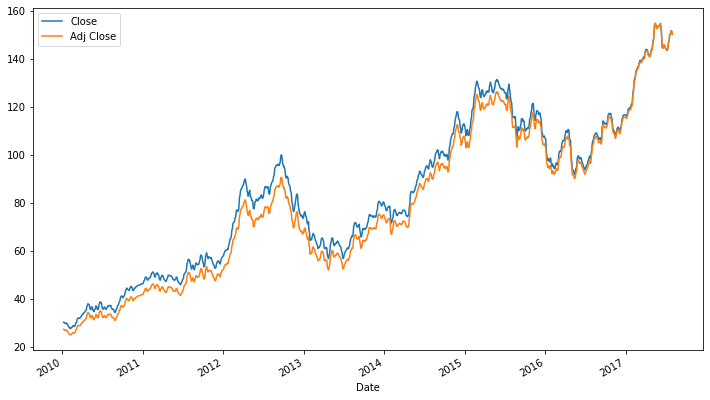

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

**My own example 75**

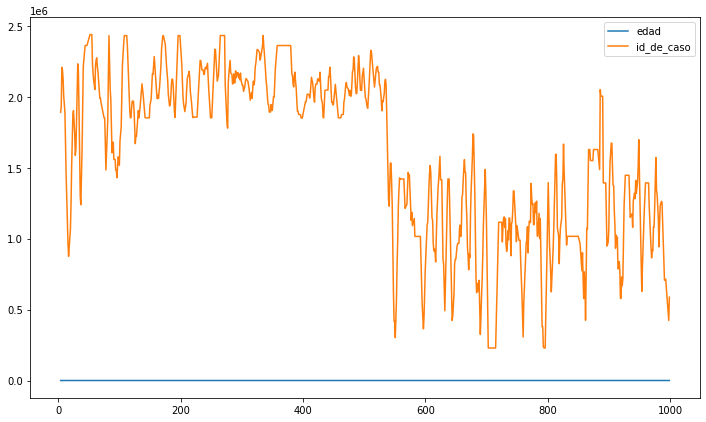

In [ ]:
dvargas.rolling(5)[['edad', 'id_de_caso']].mean().plot();

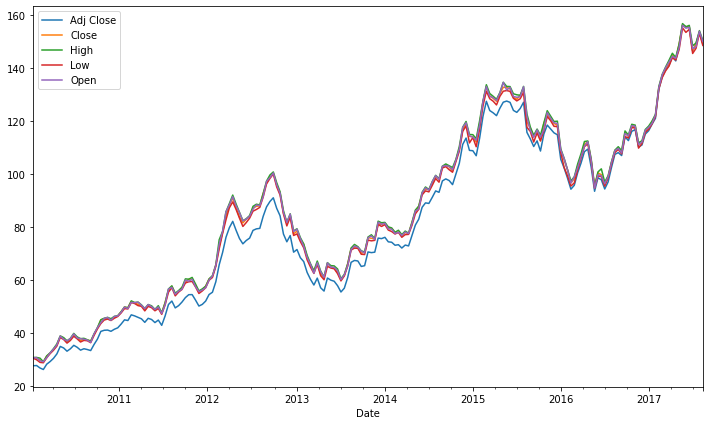

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

**My own example 76**

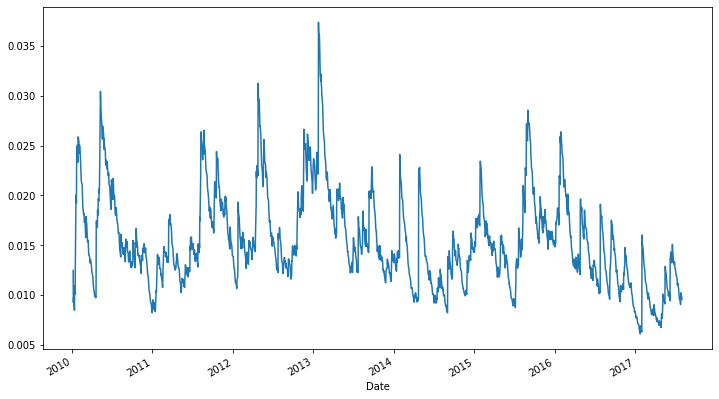

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

**My own example 77**

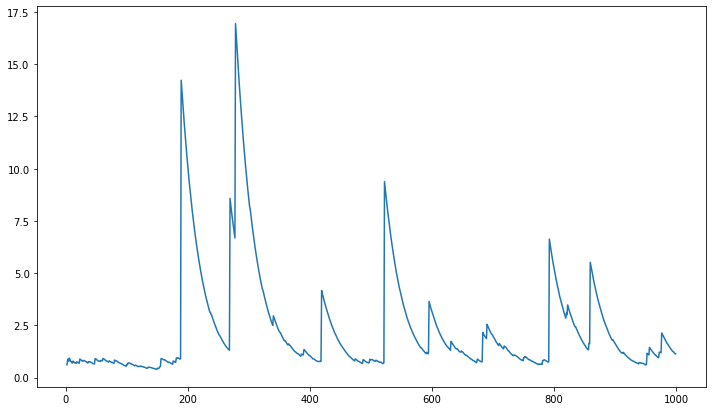

In [ ]:
dvargas['edad'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
!git clone https://github.com/ssanderson/pydata-toolbox

fatal: destination path 'pydata-toolbox' already exists and is not an empty directory.


In [ ]:
#from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Example datos.gov


In [ ]:
import pandas as pd

FrutaCali = pd.read_csv('https://www.datos.gov.co/resource/8xap-gecf.csv')
FrutaCali.head()

,municipios,producto,cantidad,anio
0,Cali,Aguacate,15,2016
1,Cali,Banano,0,2016
2,Cali,Bananito,0,2016
3,Cali,Borojó,0,2016
4,Cali,Cítricos,161,2016


In [ ]:
FrutaCali.dtypes

municipios    object
producto      object
cantidad       int64
anio           int64
dtype: object

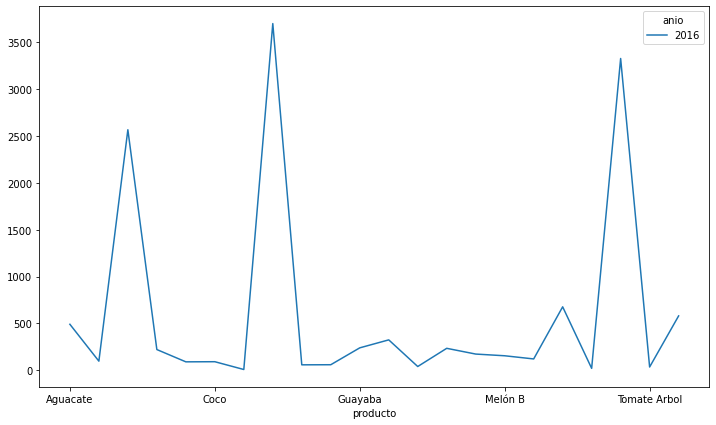

In [ ]:
FrutaCali.groupby(['producto','anio'])['cantidad'].mean().unstack().ffill().plot();

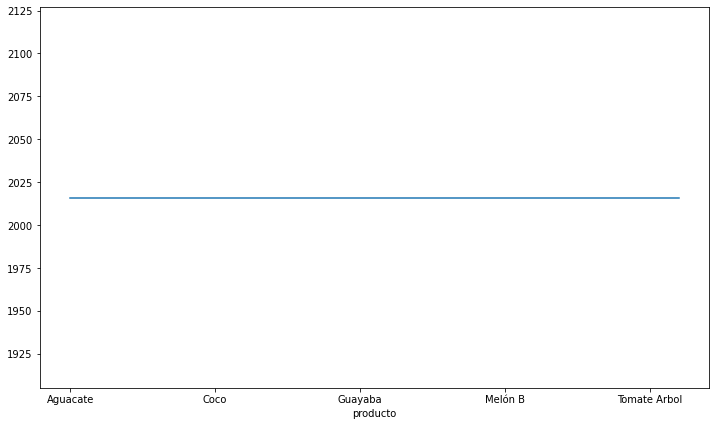

In [ ]:
FrutaCali.groupby(['producto'])['anio'].mean().ffill().plot();

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!